<a href="https://colab.research.google.com/github/maheshkajjari/uni-for-fordbikes/blob/master/fordbike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from mpl_toolkits.basemap import Basemap
%matplotlib inline

#Ford Gobike / Bay Wheels

###  Ford Gobike/Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
Problem Statement:
This analysis uses the data pertaining to trips on Ford GoBike. The major aim is to understand the following.
1. When are most trips taken in terms of Weeks, Months .
2. For sales prospective ,Trips taken based on Gender and Ages .


In [0]:
df = pd.read_csv('http://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv')

Before going further we have to look at the size of the data.

In [6]:
df.shape

(519700, 15)

In [0]:
df['member_age'] = 2018 - df['member_birth_year']

#### The structure of the dataset can be seen below(glimpse) which has 192162 records for 16 columns. 

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,31.0
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,53.0
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,21.0


## What is/are the main feature(s) of interest in your dataset?
#### The main interest would be to find when the most number of trips been taken ,when are most trips taken in terms of Weeks, Months . And for sales prospective ,Trips taken based on Gender and Ages which will help to target more customers to use the  service.

#Univariate 
### Before proceeding further into the Univariate analysis , we have the statistical summary of the data which can b seen below.

In [9]:
df.describe(include = 'all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
count,519700.000000,519700,519700,519700.000000,519700,519700.000000,519700.000000,519700.000000,519700,519700.000000,519700.000000,519700.000000,519700,453159.000000,453238,453159.000000
unique,NaN,519688,519681,NaN,272,NaN,NaN,NaN,272,NaN,NaN,NaN,2,NaN,3,NaN
top,NaN,2017-11-20 17:28:29.3730,2017-09-19 08:44:08.6320,NaN,San Francisco Ferry Building (Harry Bridges Pl...,NaN,NaN,NaN,San Francisco Caltrain (Townsend St at 4th St),NaN,NaN,NaN,Subscriber,NaN,Male,NaN
freq,NaN,2,2,NaN,15187,NaN,NaN,NaN,17378,NaN,NaN,NaN,409230,NaN,348318,NaN
mean,1099.009521,NaN,NaN,95.034245,NaN,37.771653,-122.363927,92.184041,NaN,37.771844,-122.363236,1672.533079,NaN,1980.404787,NaN,37.595213
std,3444.146451,NaN,NaN,86.083078,NaN,0.086305,0.105573,84.969491,NaN,0.086224,0.105122,971.356959,NaN,10.513488,NaN,10.513488
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.444293,3.000000,NaN,37.317298,-122.444293,10.000000,NaN,1886.000000,NaN,19.000000
25%,382.000000,NaN,NaN,24.000000,NaN,37.773492,-122.411726,23.000000,NaN,37.774520,-122.410345,787.000000,NaN,1974.000000,NaN,30.000000
50%,596.000000,NaN,NaN,67.000000,NaN,37.783521,-122.398870,66.000000,NaN,37.783830,-122.398525,1728.500000,NaN,1983.000000,NaN,35.000000
75%,938.000000,NaN,NaN,139.000000,NaN,37.795392,-122.391034,134.000000,NaN,37.795392,-122.391034,2520.000000,NaN,1988.000000,NaN,44.000000


### from the above we can see few things
1. Out of 192162 records , We can see that 161433 user types are subscribers. Which means more of riders are subscribers. 
2.We can also see that out of the 181247 gender of customers , 131064 customers are Males. But we may look deep into it and analyse whether the average duration for the individual customer type differs. 

In [0]:
for i in ['start', 'end']:
  df[i + '_time'] = pd.to_datetime(df[i + '_time'])
  df[i+ '_day_name'] = df[i+ '_time'].apply(lambda x:x.day_name())
  df[i+ '_month_name'] = df[i+ '_time'].apply(lambda x:x.month_name())
df[i+ '_hour'] = df[i+ '_time'].apply(lambda x:x.hour)

#### By doing the above coding we can see new sorted columns start day name ,start month name , end day name and end month name. 

In [11]:
 df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,start_day_name,start_month_name,end_day_name,end_month_name,end_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,31.0,Sunday,December,Monday,January,15
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,53.0,Sunday,December,Monday,January,13
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN,Sunday,December,Monday,January,11
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN,Sunday,December,Monday,January,10
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,21.0,Sunday,December,Monday,January,2


In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
duration_sec,519700,NaN,NaN,NaN,NaT,NaT,1099.01,3444.15,61,382,596,938,86369
start_time,519700,519688,2017-09-27 09:08:34.218000,2,2017-06-28 09:47:36.347,2017-12-31 23:59:01.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_time,519700,519681,2017-08-10 12:35:25.814000,2,2017-06-28 09:52:55.338,2018-01-01 15:12:50.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_id,519700,NaN,NaN,NaN,NaT,NaT,95.0342,86.0831,3,24,67,139,340
start_station_name,519700,272,San Francisco Ferry Building (Harry Bridges Pl...,15187,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_latitude,519700,NaN,NaN,NaN,NaT,NaT,37.7717,0.086305,37.3173,37.7735,37.7835,37.7954,37.8802
start_station_longitude,519700,NaN,NaN,NaN,NaT,NaT,-122.364,0.105573,-122.444,-122.412,-122.399,-122.391,-121.874
end_station_id,519700,NaN,NaN,NaN,NaT,NaT,92.184,84.9695,3,23,66,134,340
end_station_name,519700,272,San Francisco Caltrain (Townsend St at 4th St),17378,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_station_latitude,519700,NaN,NaN,NaN,NaT,NaT,37.7718,0.0862238,37.3173,37.7745,37.7838,37.7954,37.8802


## 1.Duration in Seconds
####   Duration of the trip is the important here as it identify users and also give the time for travel.

In [13]:
df['duration_sec'].describe().to_frame()


,duration_sec
count,519700.000000
mean,1099.009521
std,3444.146451
min,61.000000
25%,382.000000
50%,596.000000
75%,938.000000
max,86369.000000


## Observations

1.Mimimum duration is 61 sec and Maximum is 86369 sec appox 24 hours.
2. User uses Go bike of average of 1/2 hour .


     



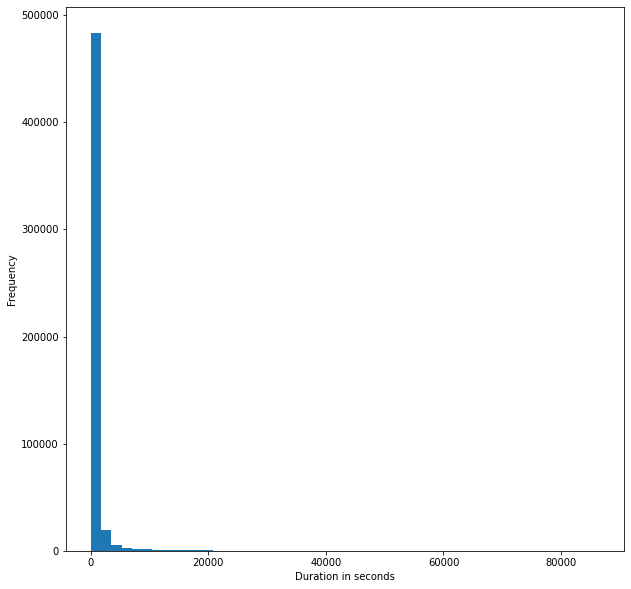

In [14]:
df['duration_sec'].plot.hist(figsize = (10 , 10),bins = 50).set(xlabel = 'Duration in seconds')
plt.show()

##### From the above, We can say that it is left skewed .There are outliners present here and also the users have taken more trips less than 10000 seconds,so with the help of boxplots we can reduce the outliners.
 

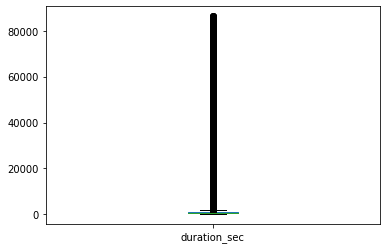

In [15]:
df['duration_sec'].plot(kind = 'box')

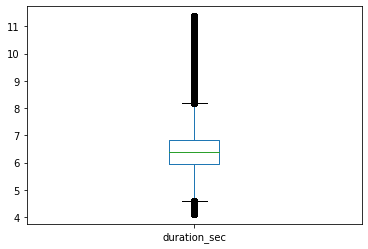

In [16]:
np.log(df['duration_sec']).plot(kind = 'box')

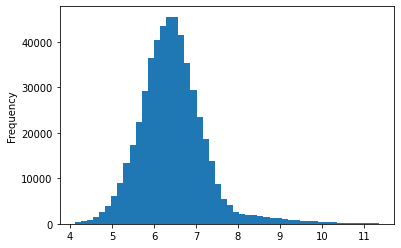

In [17]:
np.log(df['duration_sec']).plot(kind = 'hist' ,bins = 50)

In [18]:
df.query('duration_sec < 5000')['duration_sec'].describe().to_frame()

,duration_sec
count,507691.000000
mean,740.764890
std,591.552607
min,61.000000
25%,377.000000
50%,585.000000
75%,903.000000
max,4999.000000


 The plot is right skewed and shows postivie skewness. Following are the observations from the above variable:

    There are heavy outliers in our data. 1.1% of our records are for duration more than 5000 seconds.
    We used log transformation to show normality in the boxplot above.
    After plotting duration < 5000, we observed right skewness.


### 2. Box plot analysis for Members age

In [19]:
df['member_age'].describe().to_frame()

,member_age
count,453159.000000
mean,37.595213
std,10.513488
min,19.000000
25%,30.000000
50%,35.000000
75%,44.000000
max,132.000000


In [0]:
q3 = 44
q1 = 30
iqr = q3 - q1
min_value = q1 - (1.5* iqr)
max_value = q3 + (1.5* iqr)

In [21]:
max_value

65.0



 From the above table we can observe that:
1. Average age is 35-36 years. Minimum user age is 19 yrs. 75% of users are above44 yrs.
Here the max value is 65 and min value is 9 . Here v can also c some outliners.

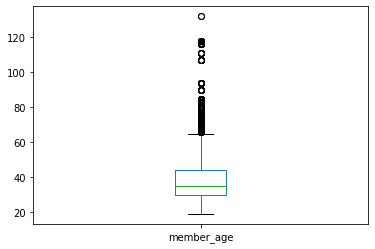

In [22]:
df['member_age'].plot(kind = 'box')

In [0]:
df['age_bracket'] = pd.cut(df['member_age'],bins =[0,20,30,40,50,60,70,80,np.inf],labels = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80+'])

In [24]:
df['age_bracket'].value_counts().to_frame().sort_index()


,age_bracket
0-20,2443
20-30,122457
30-40,181790
40-50,88180
50-60,44872
60-70,11196
70-80,1533
80+,688


In [0]:
df=df.query('member_age < 90')

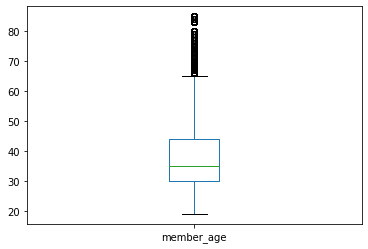

In [26]:
df['member_age'].plot(kind = 'box')

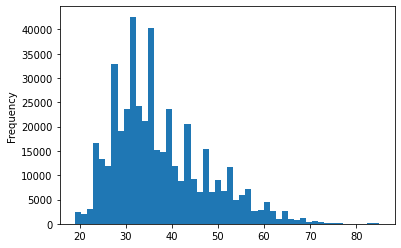

In [27]:
df['member_age'].plot(kind='hist',bins=50)

#### From the above graph we can see that the people above the age of 25 and below 60 tend to take the trip for a longer duration..

# 3.start_station_name and end station name

In [28]:
 df['start_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)               11875
San Francisco Caltrain Station 2  (Townsend St at 4th St)    11533
San Francisco Ferry Building (Harry Bridges Plaza)           11505
Market St at 10th St                                         10904
Berry St at 4th St                                           10137
                                                             ...  
Pierce Ave at Market St                                          7
Empire St at 1st St                                              3
Harmon St at Adeline St                                          3
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

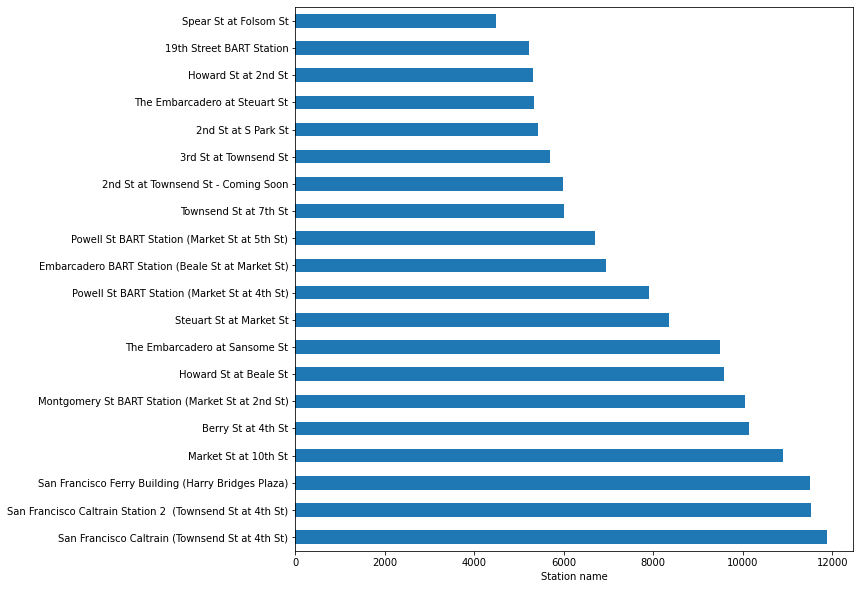

In [29]:
df['start_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' ,figsize = (10,10)).set(xlabel = 'Station name')
plt.show()

from the above graph we can observe that :

1.The most used station is San Caltrain( Townsend St at 4th St)

In [30]:
df['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)               16614
San Francisco Ferry Building (Harry Bridges Plaza)           13547
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13054
Montgomery St BART Station (Market St at 2nd St)             12266
The Embarcadero at Sansome St                                10546
                                                             ...  
Pierce Ave at Market St                                          4
Harmon St at Adeline St                                          3
Jackson St at 11th St                                            3
Empire St at 1st St                                              2
Ellsworth St at Russell St                                       2
Name: end_station_name, Length: 272, dtype: int64

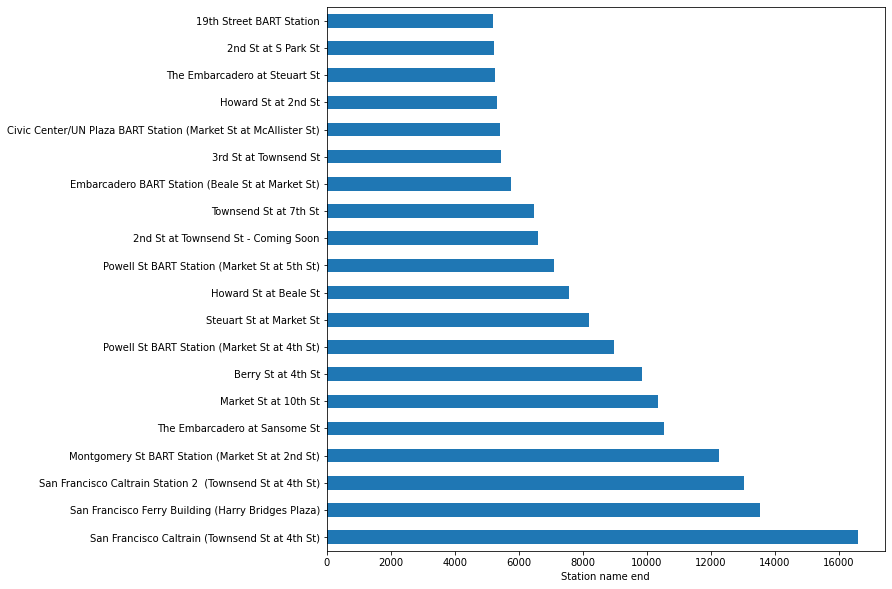

In [31]:
df['end_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh',figsize = (10,10)).set(xlabel = 'Station name end')
plt.show()

from the above graph we can observe that :

1.The most used station is San Caltrain( Townsend St at 4th St)
2. California Station 2 (Townsend St at 4th St) Seems to be the most popular among all It's the highest for the start as well as end station.

#4. User type and their gender

In [32]:
df['member_gender'].describe()

count     452680
unique         3
top         Male
freq      348049
Name: member_gender, dtype: object

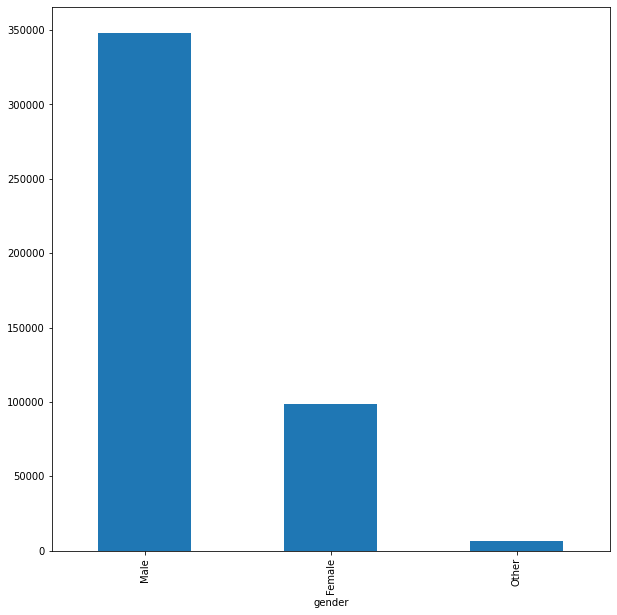

In [33]:
df['member_gender'].value_counts().plot(kind = 'bar', figsize = (10,10)).set(xlabel = 'gender')
plt.show()

Here we can observe that the male users are much more than the females.

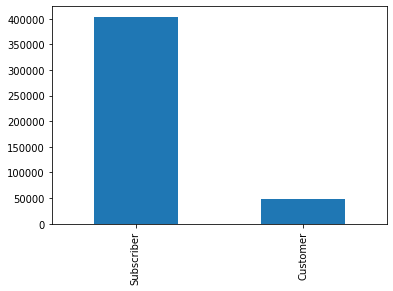

In [34]:
df['user_type'].value_counts().plot(kind = 'bar')
plt.show()

Here we can observe that the Subscriber are much more than the customer.

#Bivariate Exploration

In [35]:
df.corr()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,end_hour
duration_sec,1.000000,0.009904,0.006939,-0.000330,0.015634,0.006930,-0.001419,-0.006043,0.004894,-0.004894,0.003737
start_station_id,0.009904,1.000000,-0.337899,0.629506,0.579605,-0.321198,0.636594,-0.051323,0.105072,-0.105072,0.010056
start_station_latitude,0.006939,-0.337899,1.000000,-0.709953,-0.335516,0.987701,-0.716461,0.003145,-0.050851,0.050851,-0.004559
start_station_longitude,-0.000330,0.629506,-0.709953,1.000000,0.666386,-0.716958,0.992066,-0.081010,0.066979,-0.066979,0.044780
end_station_id,0.015634,0.579605,-0.335516,0.666386,1.000000,-0.361302,0.659532,-0.052602,0.102170,-0.102170,0.114036
end_station_latitude,0.006930,-0.321198,0.987701,-0.716958,-0.361302,1.000000,-0.718697,0.004239,-0.051088,0.051088,-0.024733
end_station_longitude,-0.001419,0.636594,-0.716461,0.992066,0.659532,-0.718697,1.000000,-0.079956,0.068975,-0.068975,0.030730
bike_id,-0.006043,-0.051323,0.003145,-0.081010,-0.052602,0.004239,-0.079956,1.000000,0.004707,-0.004707,-0.009409
member_birth_year,0.004894,0.105072,-0.050851,0.066979,0.102170,-0.051088,0.068975,0.004707,1.000000,-1.000000,0.056678
member_age,-0.004894,-0.105072,0.050851,-0.066979,-0.102170,0.051088,-0.068975,-0.004707,-1.000000,1.000000,-0.056678


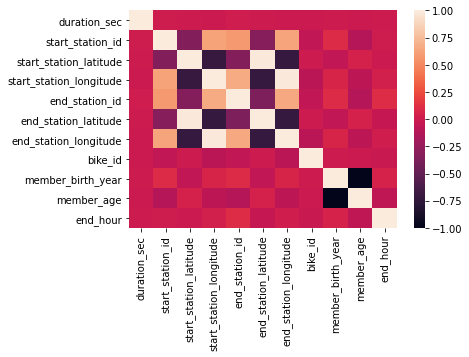

In [36]:
sns.heatmap(df.corr())
plt.show()

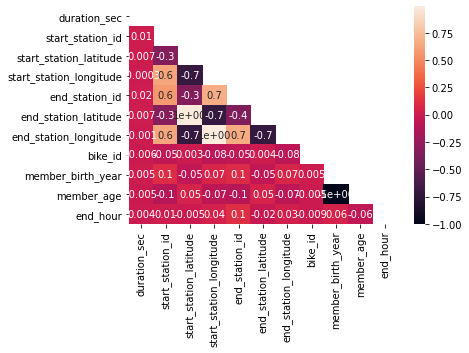

In [37]:
 matrix= np.triu(df.corr())
sns.heatmap(df.corr(), annot = True ,fmt = '.1',mask = matrix)

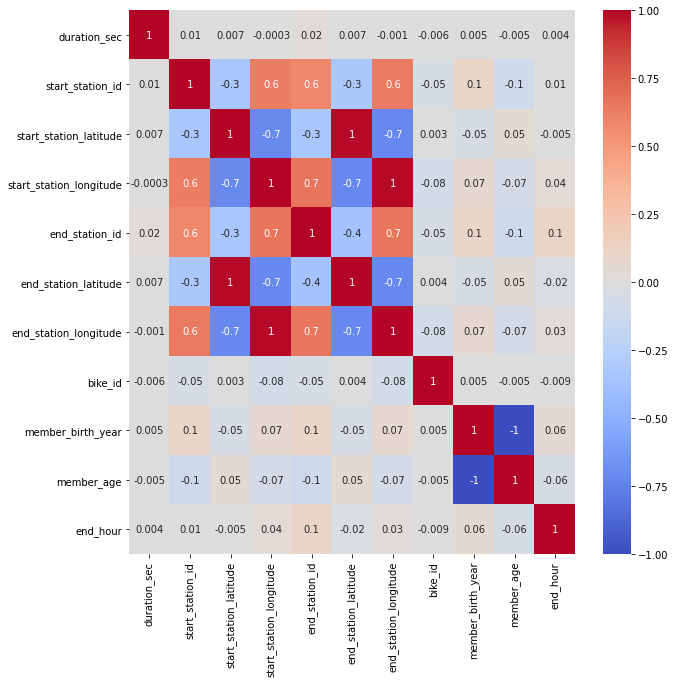

In [38]:
plt.figure(figsize=(10,10))
matrix= np.triu(df.corr())
sns.heatmap(df.corr(), annot = True ,fmt = '.1g', cmap='coolwarm')

here we can say that there is a correlation between the Longitude , Latitude level .we can plots these individually.

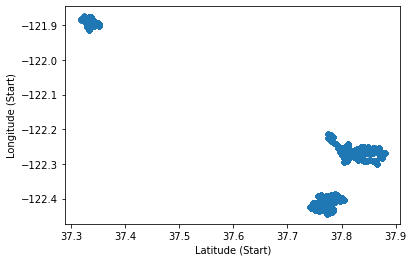

In [42]:
df.plot(kind = 'scatter' , x= 'start_station_latitude' ,y= 'start_station_longitude').set(xlabel = 'Latitude (Start)' , ylabel = 'Longitude (Start)')
plt.show()

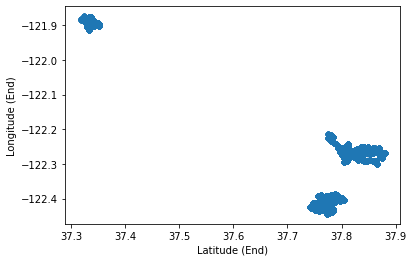

In [43]:
df.plot(kind = 'scatter' , x= 'end_station_latitude' ,y= 'end_station_longitude').set(xlabel = 'Latitude (End)' , ylabel = 'Longitude (End)')
plt.show()

 We can ignore the latitude and longitude for further analysis as nothings seems focused.. 
 

 Duration of travel for user types and genders

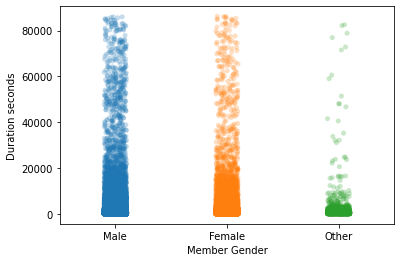

In [44]:
g = sns.stripplot(x=df["member_gender"] , y=df['duration_sec'] , jitter=True ,alpha = 0.25)
g.set_xlabel('Member Gender')
g.set_ylabel('Duration seconds')
plt.show()

Males and Females are renting the bikes for a similar duration, here we are not able to make out any difference. So exploring Which gender are our subscribers.


In [45]:
pd.crosstab(df["user_type"] , df['member_gender'])

member_gender,Female,Male,Other
user_type,,,
Customer,14762,33059,881
Subscriber,83646,314990,5342


We can see that most of the subscribers are Males. A significant amount of increase as compared to other genders , meanwhile for Customers there is not a significant difference

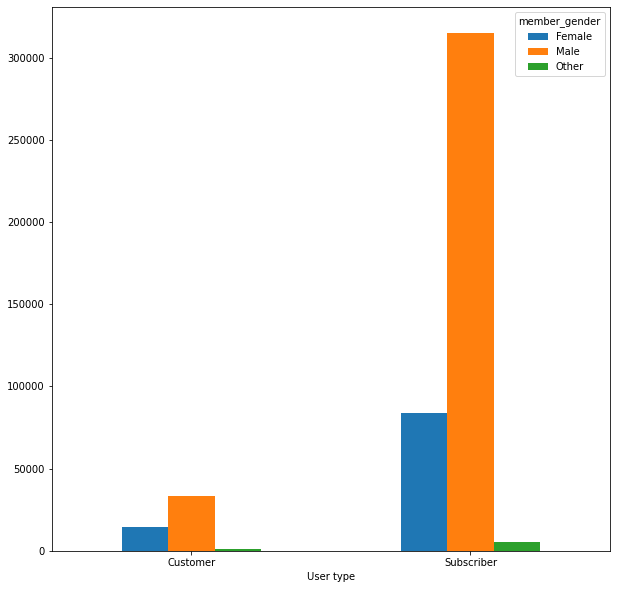

In [46]:
pd.crosstab(df["user_type"] , df['member_gender']).plot(kind = 'bar' , figsize = (10,10) , rot = 0).set(xlabel = 'User type')
plt.show()


Multivariate Exploration